In [11]:
# import os
# import csv

# authors = os.listdir("./C50/C50train")
# for a in authors:
#     if not os.path.isdir("./C50/C50train/" + a):
#         print(a)
#         os.remove("./C50/C50train/" + a)
# len(authors)

# authors_test = os.listdir("./C50/C50test")
# for at in authors_test:
#     if not os.path.isdir("./C50/C50test/" + at):
#         print(at)
#         os.remove("./C50/C50test/" + at)
#     if at not in authors:
#         print(at)
# len(authors_test)

# header = ['index', 'author', 'title', 'train', 'content']
# table_name = "./datasets/ccat50"
# f = open(table_name + ".csv", 'w', encoding='UTF8')
# writer = csv.writer(f)
# writer.writerow(header)

# for a in authors:
#     articles_train = os.listdir("./C50/C50train/" + a)
#     articles_test = os.listdir("./C50/C50test/" + a)
#     for art_train in articles_train:
#         if not art_train.endswith('.txt'):
#             continue
#         file = open("./C50/C50train/" + a + "/" + art_train)
#         line = file.read().replace("\n", " ")
#         file.close()
#         writer.writerow(['', a, art_train[:-4], 1, line])
#     for art_test in articles_test:
#         if not art_test.endswith('.txt'):
#             continue
#         file = open("./C50/C50test/" + a + "/" + art_test)
#         line = file.read().replace("\n", " ")
#         file.close()
#         writer.writerow(['', a, art_train[:-4], 0, line])
# f.close()

50

## Visualization

In [2]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import time
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
from sklearn.decomposition import PCA
import pandas as pd

In [71]:
def scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int64)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('on')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

def pca_visualize(pool, colors):
    time_start = time.time()

    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(pool)

    print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]

    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

    top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
    
    scatter(top_two_comp.values,colors)
    
def tsne_visualize(pool, colors):
    RS = 123
    model_tsne = TSNE(random_state=RS).fit_transform(pool)
    scatter(model_tsne, colors)

output_list.pt stores the stacked predictions of the test samples in the format of [#samples, #classes]; label_list stores the true labels of all samples in a list of length #samples;

In [46]:
output_list = torch.load("output_list.pt").cpu().numpy() # replace with your own output_list and label_list
label_list = torch.load("label_list.pt")
truth_list = []
for l in label_list:
    l = l.cpu().numpy().astype(np.int32)
    truth_list = np.concatenate((truth_list, l))
truth_label = truth_list.astype(np.int64)

In [38]:
viewed_samples = 1000 # number of points to be seen
pool = output_list[:viewed_samples]
print(pool.shape)
colors = truth_label[:viewed_samples]
print(len(colors))

In [64]:
# check out the unique colors included, make sure a consecutive list starting from 0 is included
print(np.unique(colors))

[0 1 2 3 4 5 6 7 8 9]


PCA done! Time elapsed: 0.0036525726318359375 seconds
Variance explained per principal component: [0.23802908 0.13180317 0.11212894 0.0947064 ]


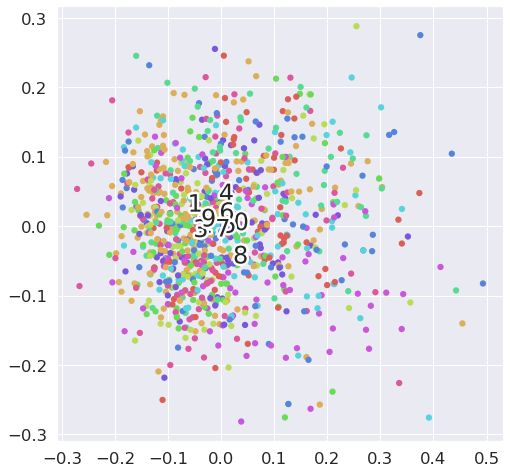

In [68]:
# sample run of pca
pca_visualize(pool, colors)

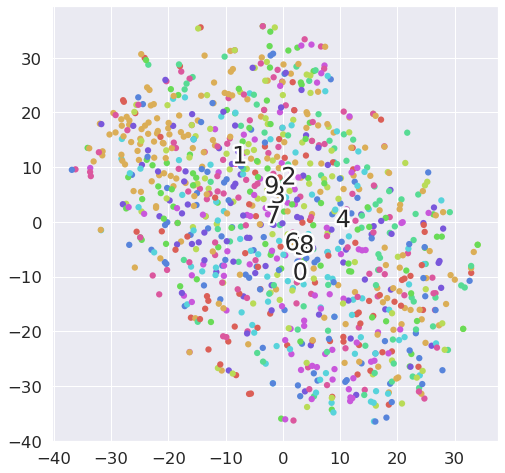

In [72]:
# sample run of tsne
tsne_visualize(pool, colors)